# Xử lý ảnh

## INT3404 1 ----- 7-9 Monday - 303GD2
## Diep Ng., Ph.D.

### Mail-to: ngocdiep at vnu.edu.vn



In [1]:
!python --version

Python 3.6.8 :: Anaconda, Inc.


# Tuần 3: Histogram

In [3]:
!pip install imutils


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25855 sha256=ef7f00b6c31fba716d7bc404010652b1ebd22b3fbd926f85654a636b29d57c3e
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\5b\76\96\ad0c321506837bef578cf3008df3916c23018435a355d9f6b1
Successfully built imutils


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.rcParams['figure.figsize'] = [10,8]

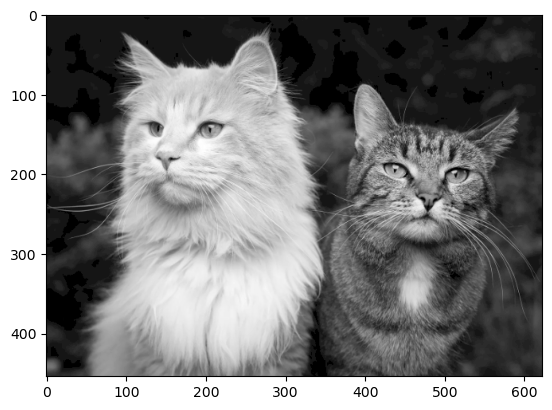

In [4]:
import imutils
img = cv2.imread("cat.png", 0)
plt.imshow(img, cmap='gray')

In [12]:
img.shape

(1024, 1538)

# 1. Calculate Histogram

1. Using `cv2.calcHist` from OpenCV
2. Using `numpy.histogram` function

In [5]:
#using cv2.calcHist()
hist = cv2.calcHist(
                    [img],
                    channels=[0],
                    mask=None, #full image
                    histSize=[256], #full scale
                    ranges=[0,256]
)


In [6]:
hist.shape

(256, 1)

In [16]:
sum(hist)

array([1574912.], dtype=float32)

In [7]:
img.shape[0] * img.shape[1]

282842

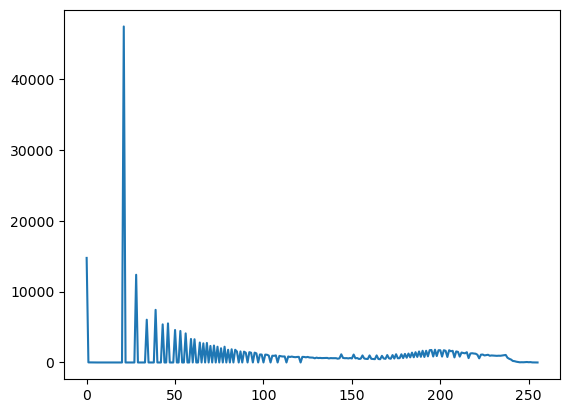

In [8]:
plt.plot(hist)

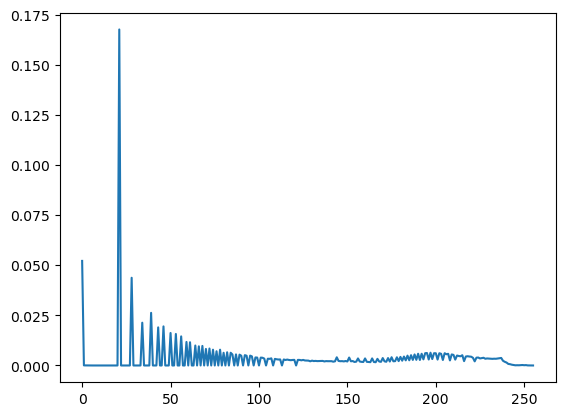

In [9]:
#normalized histogram
h, w = img.shape[:2]
normalized_hist = hist/(h*w)
plt.plot(normalized_hist)

In [10]:
def plot_img_and_hist(img):
    '''Draw image together with its histogram and cdf'''
    hist = cv2.calcHist(
                    [img],
                    channels=[0],
                    mask=None, #full image
                    histSize=[256], #full scale
                    ranges=[0,256]
    )
    h, w = img.shape[:2]
    normalized_hist = hist/(h*w)
    cdf = normalized_hist.cumsum()
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.plot(normalized_hist, 'r')
    plt.plot(cdf, 'b--')
    plt.legend(('histogram', 'cdf'), loc='upper left')
    



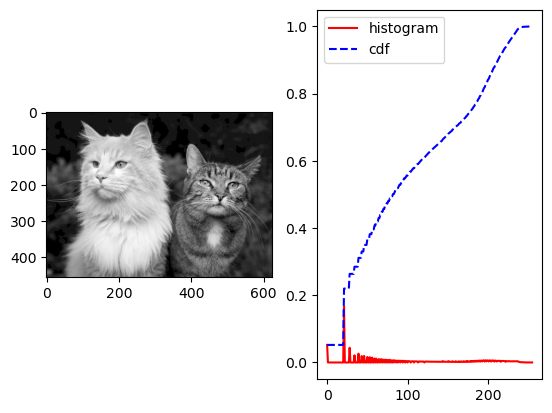

In [12]:
plot_img_and_hist(cv2.imread("cat.png", 0))

In [27]:

 
# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
 
# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)
 
# calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))
 
# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

In [30]:
magnitude

array([[ 90,  91,  91, ...,  91,  91,  90],
       [ 98, 102, 108, ..., 108, 108, 102],
       [ 98, 112, 113, ..., 112, 110,  87],
       ...,
       [ 99, 101, 103, ..., 109, 100, 101],
       [ 87, 110, 112, ..., 113, 112,  98],
       [102, 108, 108, ..., 108, 102,  98]], dtype=uint8)

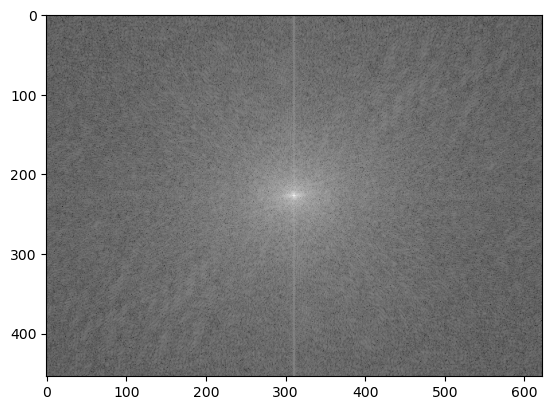

In [29]:
plt.imshow(magnitude,cmap='gray')

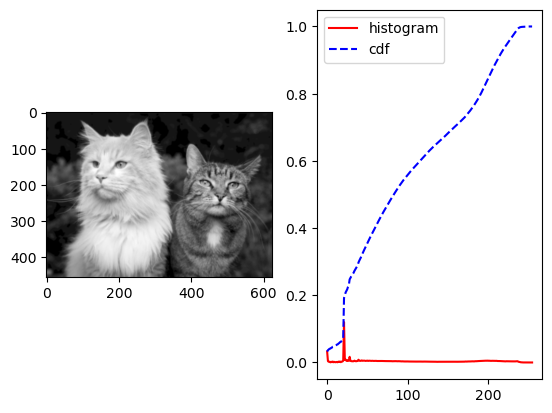

In [25]:
plot_img_and_hist(fimage)

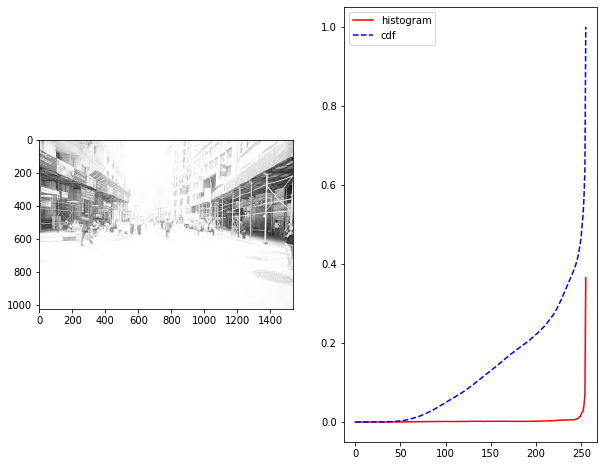

In [87]:
plot_img_and_hist(cv2.imread("high-exposure.jpg", 0))

In [13]:
#from week 2
#reference: https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/
def adjust_image_gamma_lookuptable(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    table = np.array([((i / 255.0) ** gamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

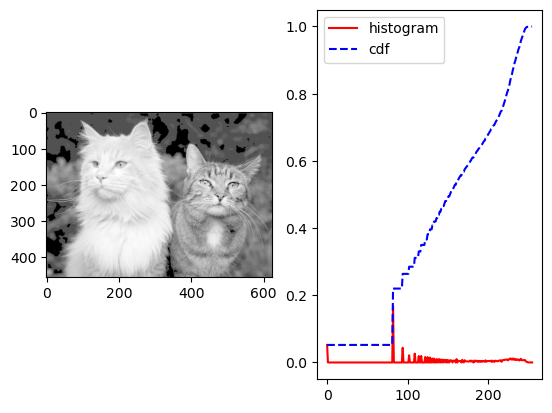

In [14]:
img_adjusted = adjust_image_gamma_lookuptable(img, gamma=0.45)
plot_img_and_hist(img_adjusted)

In [15]:
#using numpy 
h2 = np.histogram(img.ravel(), bins=256, range=[0, 256])
h2

(array([14759,    13,     8,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 47423,     0,     0,     0,     0,     0,
            0, 12380,     0,     0,     0,     0,     0,  6037,     0,
            0,     0,     0,  7429,     0,     0,     0,  5377,     0,
            0,  5516,     0,     0,     0,  4587,     0,     0,  4447,
            0,     0,  4106,     0,     0,  3321,     0,  3278,     0,
            1,  2816,     0,  2700,     0,  2758,     0,  2333,     0,
         2391,     0,  2225,     0,  2006,     0,  2226,     0,  1792,
            0,  1863,     0,  1796,  1546,     0,  1560,     0,  1528,
         1379,     0,  1458,  1376,     0,  1391,  1283,     0,  1132,
         1115,     0,  1110,  1089,   973,     0,   953,   937,  1005,
            0,   931,   875,   840,   851,     0,   846,   777,   833,
          776,   746,   778,   791,     0,   789,   780,   729,   784,
      

In [91]:
h2[0].shape

(256,)

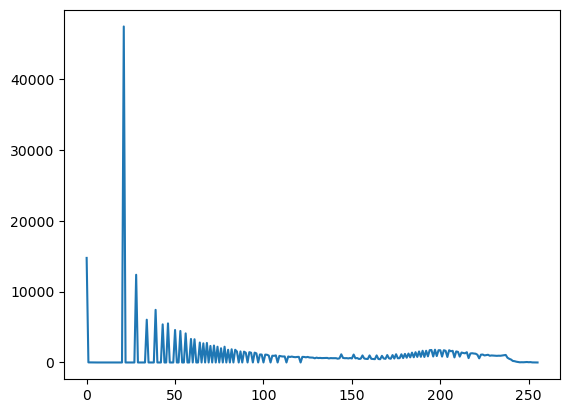

In [16]:
plt.plot(h2[0])

# 2. Histogram equalization

In [17]:
def hist_equalize(img):
    #1. calculate hist
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    #2. normalize hist
    h, w = img.shape[:2]
    hist = hist/(h*w)
    
    #3. calculate CDF
    cdf = np.cumsum(hist)
    s_k = (255 * cdf-0.5).astype("uint8")
    return s_k

In [142]:
# view the conversion s_k
hist_equalize(img)

array([  0,  19,  65, 101, 135, 156, 168, 178, 186, 191, 193, 194, 195,
       195, 196, 203, 224, 249, 251, 252, 252, 252, 252, 252, 252, 252,
       252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 25

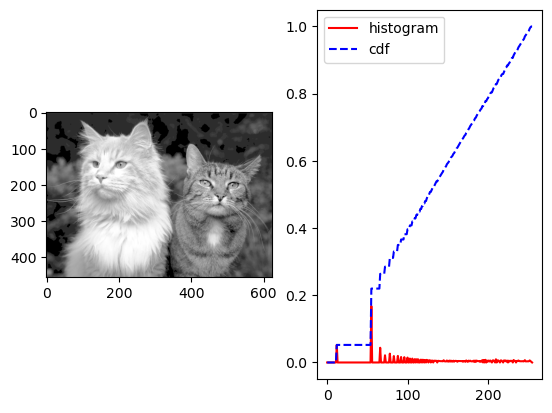

In [18]:
s_k = hist_equalize(img)
equalized_img = cv2.LUT(img, s_k)
plot_img_and_hist(equalized_img)

## Using OpenCV function

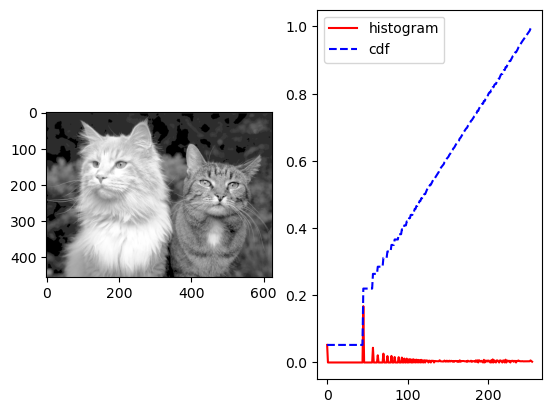

In [19]:
img_equalized = cv2.equalizeHist(img)
plot_img_and_hist(img_equalized)

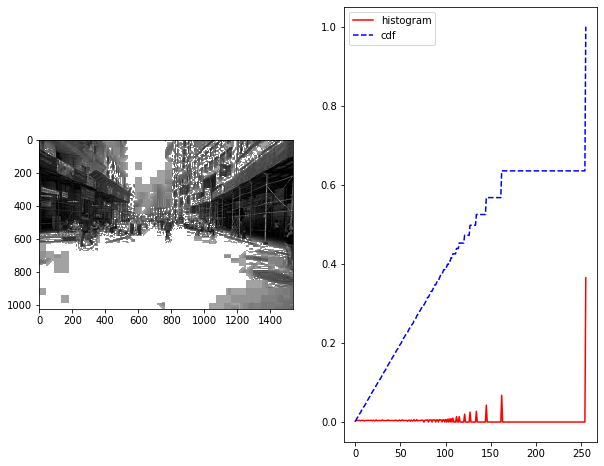

In [94]:
high_exposure_img = cv2.imread('high-exposure.jpg',0)
he_equalized = cv2.equalizeHist(high_exposure_img)
plot_img_and_hist(he_equalized)

# 3. Adaptive Histogram equalization

Image is divided into small blocks called "tiles" (e.g., 8x8 pixels).

Each block is histogram equalized as usual.

In a small area, histogram would confine to a small region (unless there is noise).

If noise is there, it will be amplified --> to avoid this, **contrast limiting* is applied.

If any histogram bin is above the specified contrast limit (e.g., 40), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

Refs: https://docs.opencv.org/master/d2/d74/tutorial_js_histogram_equalization.html


In [20]:
clahe = cv2.createCLAHE(clipLimit=40, tileGridSize=(8,8))
high_clahe = clahe.apply(high_exposure_img)
plot_img_and_hist(high_clahe)

NameError: name 'high_exposure_img' is not defined

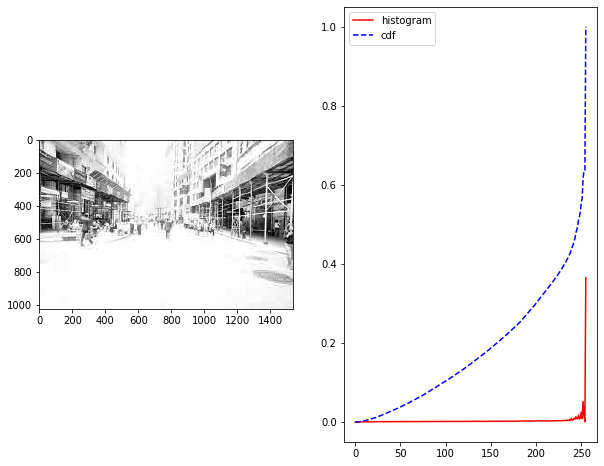

In [96]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
high_clahe = clahe.apply(high_exposure_img)
plot_img_and_hist(high_clahe)

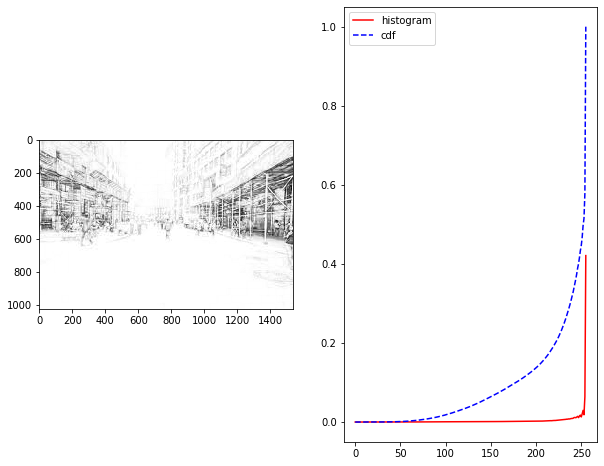

In [97]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(100,100))
high_clahe = clahe.apply(high_exposure_img)
plot_img_and_hist(high_clahe)

# 4. Histogram matching

Compute the cumulative histograms for source & target images
Interpolate linearly to find the unique pixel values in the template image that most closely match the quantiles of the unique pixel values in the source image.

Ref: https://stackoverflow.com/questions/32655686/histogram-matching-of-two-images-in-python-2-x

In [103]:
def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)
    result = interp_t_values[bin_idx].reshape(oldshape)
    result = result.astype(np.uint8)
    return result

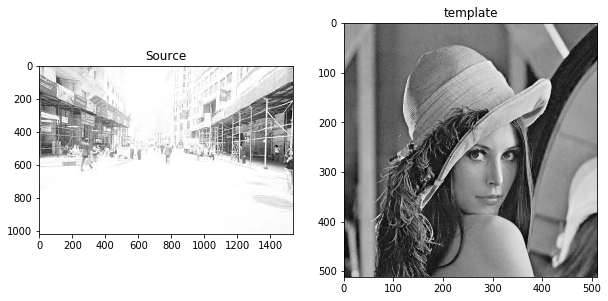

In [104]:
source = cv2.imread("high-exposure.jpg", 0)
template = cv2.imread("lena.jpg",0)
plt.subplot(1, 2, 1)
plt.imshow(source, cmap='gray')
plt.title("Source")
plt.subplot(1,2,2)
plt.imshow(template, cmap='gray')
plt.title("template")
plt.show()

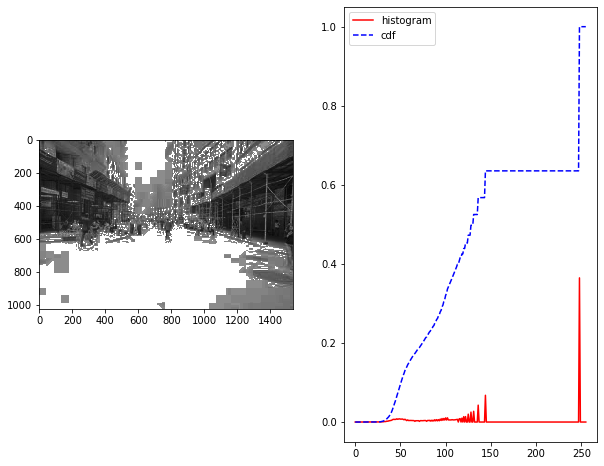

In [105]:
he_matched = hist_match(source, template)
plot_img_and_hist(he_matched)

# 5. Image retrieval using histogram

Flower data from: http://www.robots.ox.ac.uk/~vgg/data/flowers/17/index.html

In [110]:
def calcHist(img, bins_per_channel=20):
    '''
    img with shape (h, w, 3)
    '''
    h, w = img.shape[:2]
    hist = [
            np.histogram(img[:,:, i], bins=20, range=(0, 256))[0]
            for i in range(3)
    ]
    hist = np.array(hist).ravel()
    hist = hist/(h*w) #normalize
    return hist

In [116]:
#all images
import glob
inames = glob.glob("./flowers/*.jpg")
images = [
            cv2.imread(iname)
            for iname in inames
]
#all histograms
xs = [ 
            calcHist(img)
            for img in images
]


In [123]:
#input image
from scipy.spatial import distance
input_img = images[0]
input_hist = xs[0]
all_dists = [
                distance.euclidean(input_hist, xi)
                for xi in xs
]

sorted_idxs = np.argsort(all_dists)

ranked_images = [images[i] for i in sorted_idxs]

In [124]:
sorted_idxs

array([ 0, 10,  3,  8,  5, 11,  6,  2,  9,  7,  1,  4])

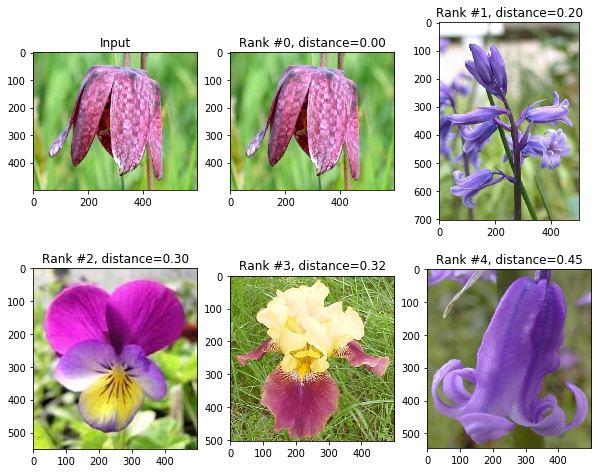

In [129]:
#plot top 5 images
plt.subplot(2, 3, 1)
plt.imshow(input_img[:,:,::-1])
plt.title("Input")
for i in range(0, 5):
    plt.subplot(2, 3, i+2)
    idx = sorted_idxs[i]
    found = ranked_images[i]
    dist = all_dists[idx]
    plt.imshow(found[:,:,::-1])
    plt.title("Rank #{}, distance={:.2f}".format(i, dist))
plt.show()